In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


#Análise dos dados: Gráficos
---



# <font color=\red\> *TAXA DE ACEITAÇÃO DO ENTREGADOR* </font>

In [ ]:
df_attendance = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/attendance rate.csv")
df_attendance.head()

,STOREKEEPER_ID,ACCEPTANCE_RATE
0,907442.0,0.666102
1,1393441.0,0.556538
2,1061798.0,0.777838
3,103460.0,0.160980
4,1259998.0,0.856102


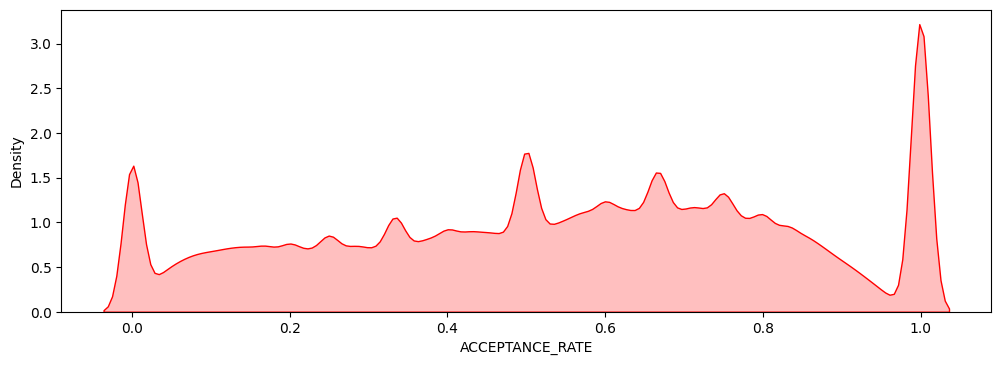

In [ ]:
plt.figure(figsize=(12,4), dpi = 100)
sns.kdeplot(data = df_attendance, x = "ACCEPTANCE_RATE", bw_adjust=0.5,shade=True,color='red')
plt.show()

# É visivel que existem muitos RTs com notas 0,0 ou 1,0 que pensamos ser entregadores com muito poucas entregas e seus dados podem não ser tão beneficiais para o desenvolvimento do produto.
# Outro ponto relevante é a quantidade de RTs próximos de 0,5, que dialoga diretamente com a média obtida (0,537). O restante do grafico é relativamente constante, com uma maior concentração na região acima de 0,5

# <font color=\red\> *TAXA DE LEVEL POR CONTA CHURN* </font>

In [ ]:
df_contasChurn = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/criacao contas churn-002.csv")
df_contasChurn.rename(columns={"ID":"STOREKEEPER_ID"} ,inplace=True)
df_contasChurn.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STOREKEEPER_ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,1286316,Adailton,M,Grande São Paulo,2021-06-07,motorbike,True,bronze,2022-01-16T23:27:35Z
1,1110698,Adriano Floriano Da Silva,M,Recife,2021-02-11,bicycle,True,bronze,2021-07-15T11:16:04Z
2,284886,Bruno,M,Grande São Paulo,2019-07-03,motorbike,False,bronze,2021-07-07T12:33:21Z
3,1036587,Vinicius,M,Paulínia,2020-12-21,motorbike,True,bronze,2021-09-12T16:45:27Z
4,106854,Eduardo,M,Grande São Paulo,2019-02-11,motorbike,True,bronze,2021-11-14T13:45:57Z


Text(0.5, 1.0, 'Contas Churn')

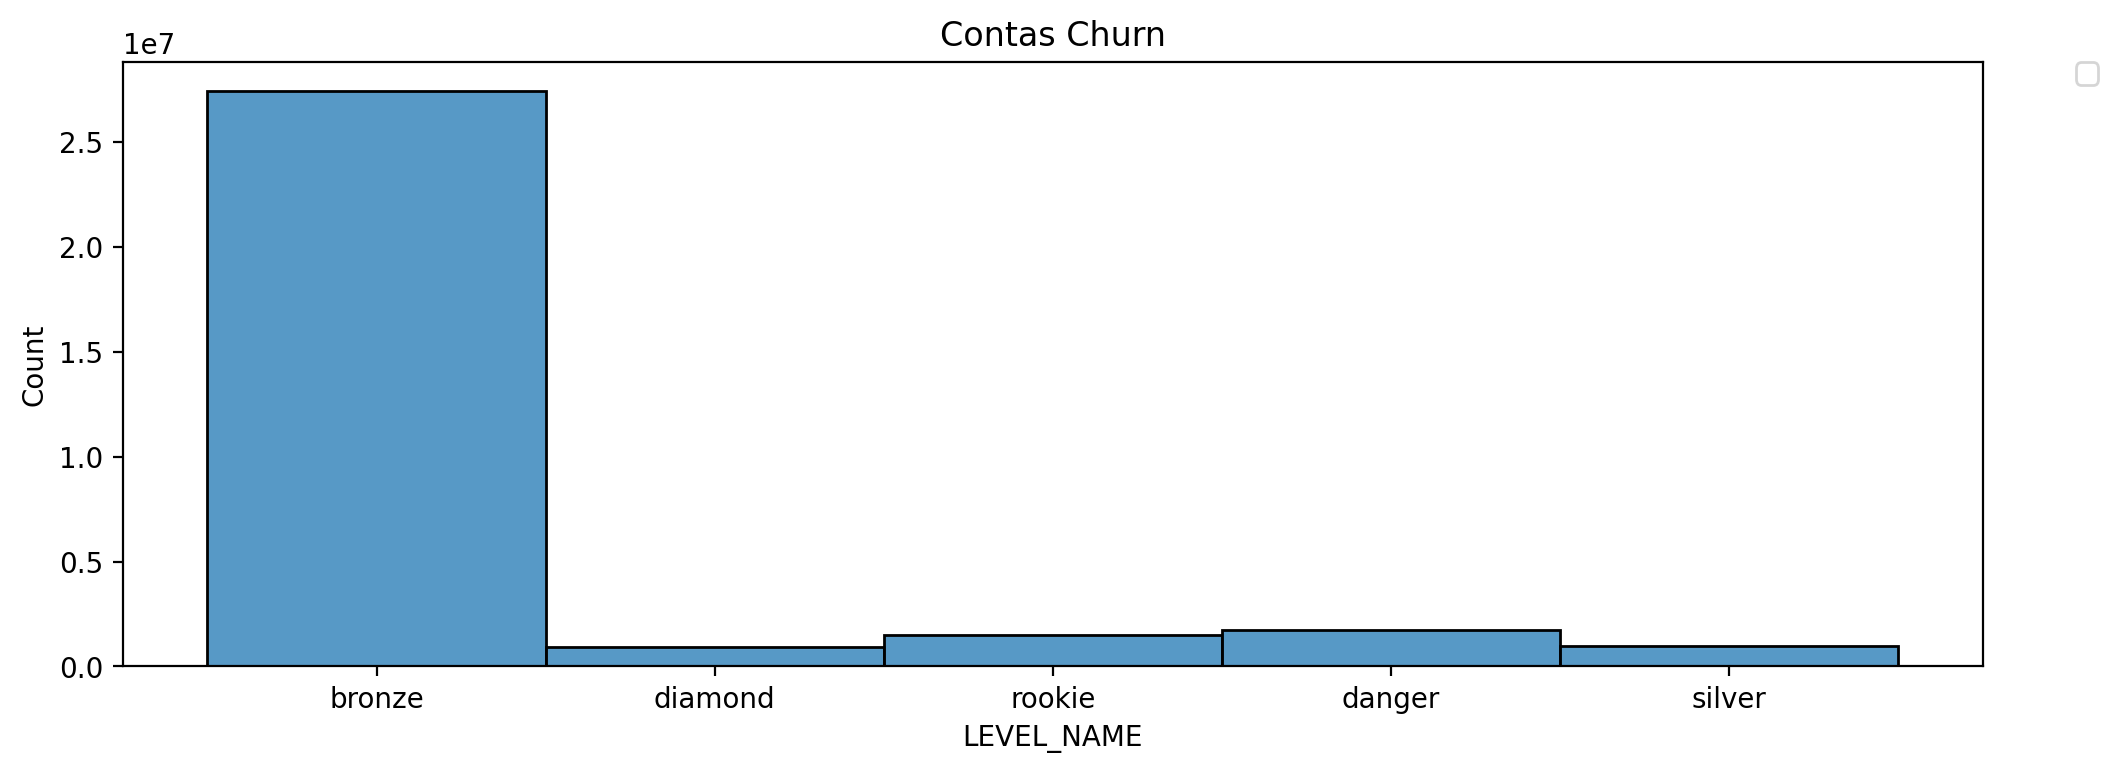

In [ ]:
plt.figure(figsize=(12,4), dpi = 200)
sns.histplot(x='LEVEL_NAME',data=df_contasChurn)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Contas Churn') 

#É perceptível que o número do rank bronze, é extremamente superior ao resto dos Levels, portanto, provando que o maior número de churn são Bronzes(depois de atingir 20 entregas) e não rookies(antes de atingir 20 entregas)

# <font color=\red\> *TAXA DE AUTO ACEITE ENTRE ENTREGADORES* </font>

In [ ]:
#
df_infos = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/infos gerais.csv")
df_infos.rename(columns={"ID":"STOREKEEPER_ID"} ,inplace=True)
df_infos_autoaceite = df_infos[["STOREKEEPER_ID", "AUTO_ACEITE"]]
df_infos_autoaceite.head()

,STOREKEEPER_ID,AUTO_ACEITE
0,1561246,True
1,1561210,True
2,1561205,True
3,1561173,True
4,1561132,False


In [ ]:
df_autoaceite_churn = df_infos_autoaceite.merge(df_contasChurn, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
df_autoaceite_churn.head()

,STOREKEEPER_ID,AUTO_ACEITE,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,1544047,True,Raquel,F,Belo Horizonte,2022-07-03,car,False,rookie,2022-07-03T20:29:39Z
1,1543824,True,Ana Lúcia,F,Grande São Paulo,2022-07-03,bicycle,False,rookie,2022-07-03T19:12:43Z
2,1543721,True,Jihan,M,Grande São Paulo,2022-07-02,car,True,rookie,2022-07-03T21:18:46Z
3,1543721,True,Jihan,M,Grande São Paulo,2022-07-02,car,True,rookie,2022-07-03T21:18:46Z
4,1543721,True,Jihan,M,Grande São Paulo,2022-07-02,car,True,rookie,2022-07-03T21:18:46Z


In [ ]:
col_select = 'AUTO_ACEITE'
plot_title = 'Representação dos entregadores que tem o auto aceite ativo'

import plotly.express as px
fig = px.pie(df_infos_autoaceite, values= df_infos_autoaceite[col_select].value_counts() , title = plot_title, names = df_infos_autoaceite[col_select].unique())
fig.show()


#A função de autoaceite é utilizada para aumentar o número de entregas dos RTs, ele é utilizado para aceitar automaticamente os pedidos e pode ter impacto na porcentagem de churn.

# <font color=\red\> *Auto aceite entre contas churns* </font>

In [ ]:
col_select = 'AUTO_ACEITE'
plot_title = 'Representação dos entregadores contas churn que tem o auto aceite ativo'

import plotly.express as px
fig = px.pie(df_autoaceite_churn, values= df_autoaceite_churn[col_select].value_counts() , title = plot_title, names = df_autoaceite_churn[col_select].unique())
fig.show()



NameError: ignored

#Diferente do que o grupo esperava, a opção de autoaceite não tem um grande impacto na taxa de churn, tendo um aumento muito pequeno no resultado. Não é um resultado muito útil para a equipe

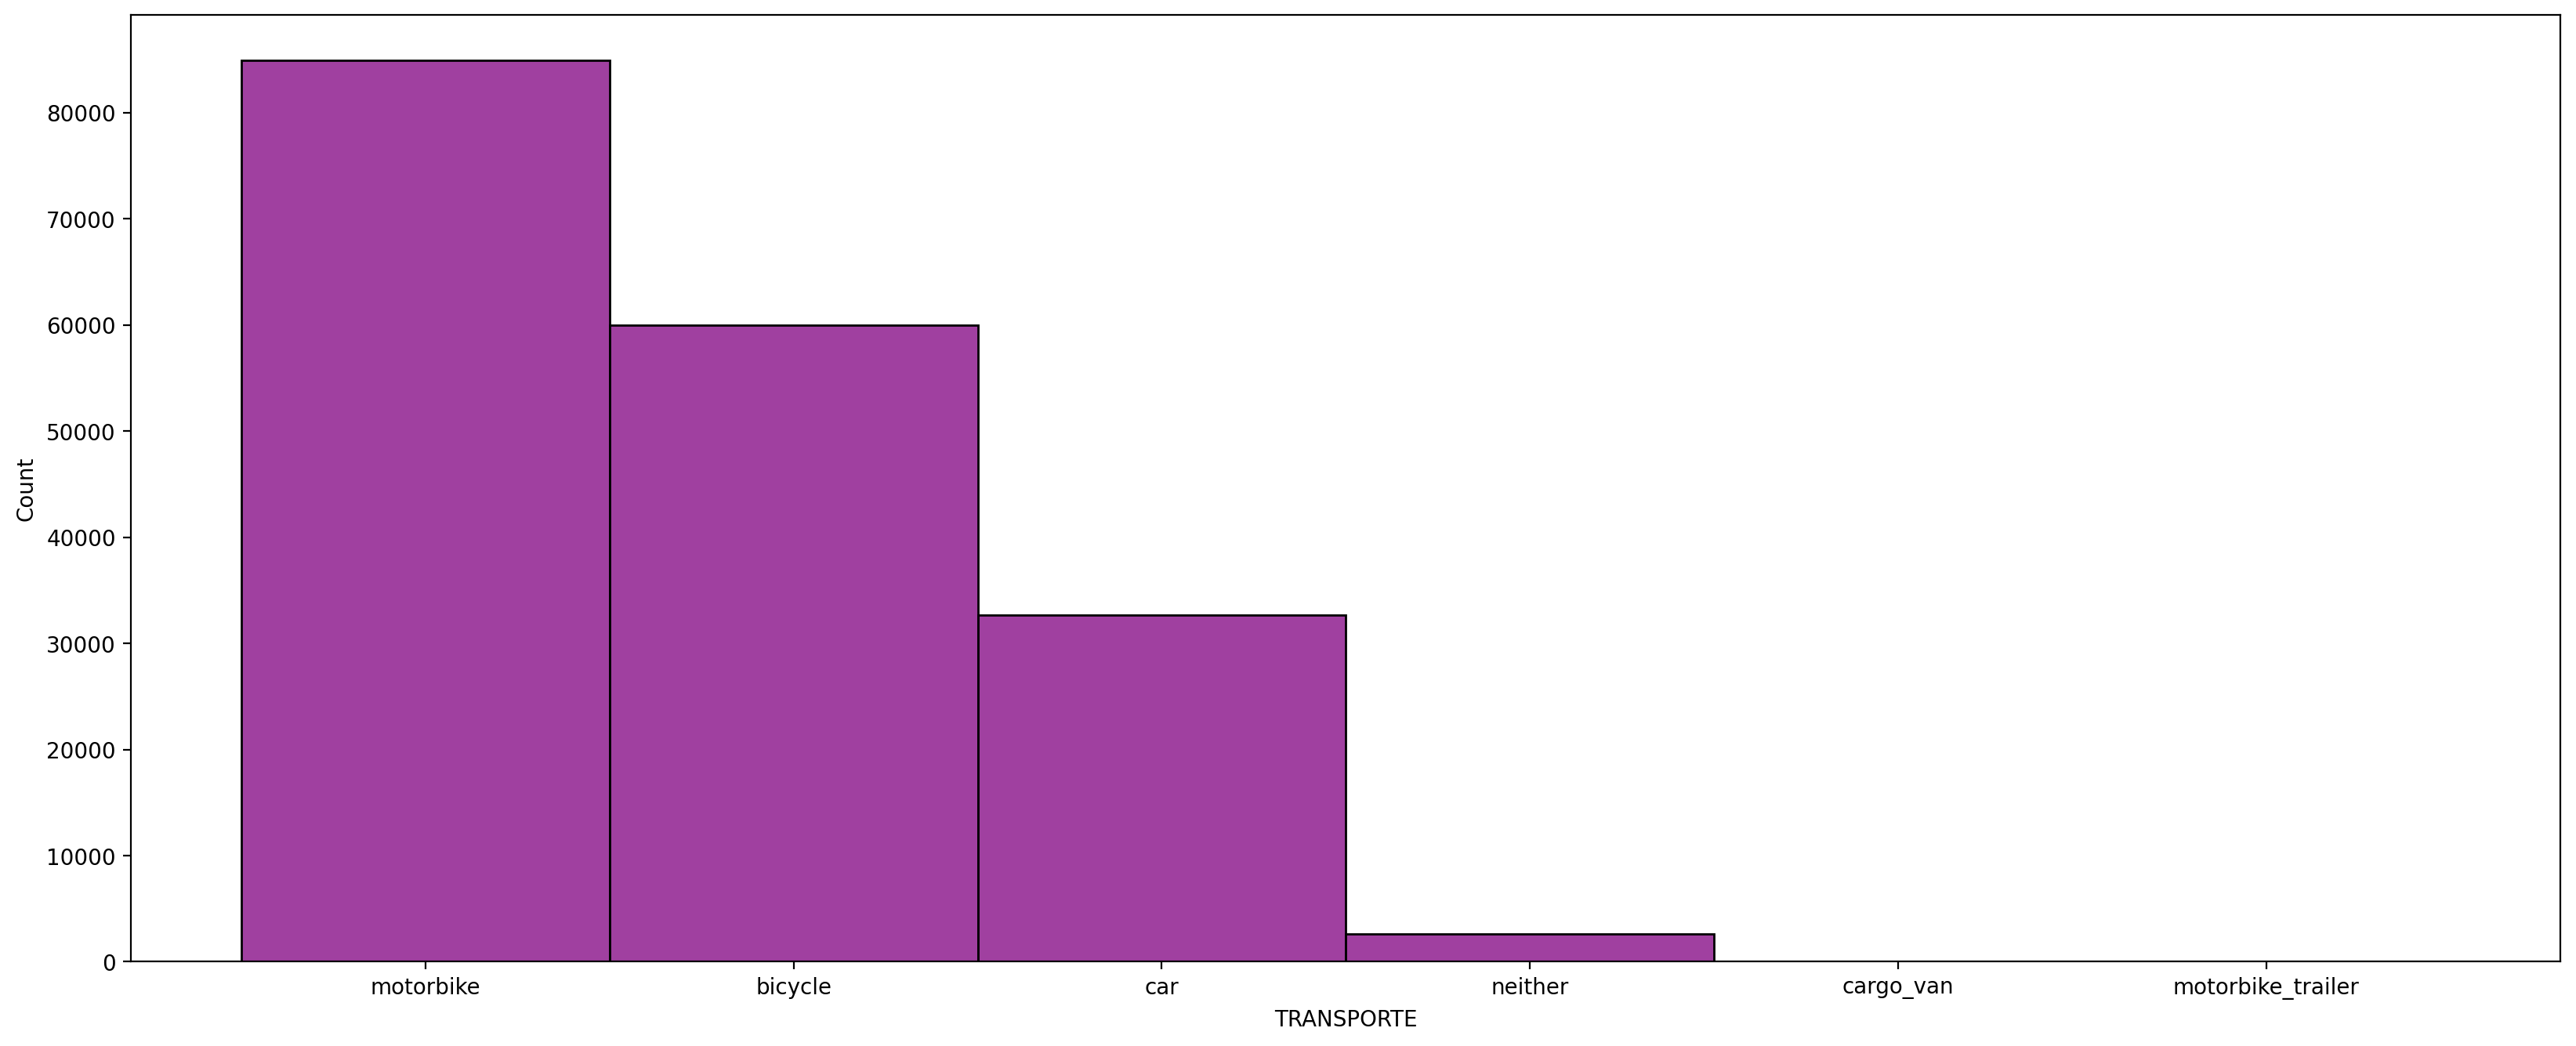

In [ ]:
plt.figure(figsize=(20,8), dpi = 200)
df_infos_modalidade = df_infos[["TRANSPORTE", "STOREKEEPER_ID"]]
sns.histplot(data = df_infos_modalidade, x = "TRANSPORTE",color='purple')

#A maioria dos entregadores utilizam motos, ou seja, está dentro da hipótese que a gasolina pode influenciar o churn.

In [ ]:
# Código de filtragem e tabelas extras para os dados
df_kill = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/2022-08-10 10_40am.csv")
df_kill_distance = df_kill[["DISTANCE_TO_USER", "STOREKEEPER_ID"]]
df_kill_distance.head()
df_earnings = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/earnings.csv")
df_earnings_earnings = df_earnings[["EARNINGS", "STOREKEEPER_ID"]]


df_compDef = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/comp defects.csv")
df_compDef_level = df_compDef[["LEVEL_NAME", "STOREKEEPER_ID"]]

df_orders = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/Ordens Done e Cancel.csv")
df_orders_done_cancel = df_orders[["ORDERS_DONE", "ORDERS_CANCEL", "STOREKEEPER_ID" ]]

df_productReturn = pd.read_csv("/content/drive/Shareddrives/Grupo Rappitendeiros/Product return.csv")
df_productReturn.rename(columns={"ID_ENTREGADOR":"STOREKEEPER_ID"} ,inplace=True)
df_productReturn_return = df_productReturn[["PRODUCT_RETURNS", "STOREKEEPER_ID"]]  









/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Dados que serão usados no projeto

In [ ]:

df_dados = df_attendance.merge(df_earnings_earnings, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID') # Earnings

df_dados2 = df_dados.merge(df_compDef_level, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID') # Level

df_dados3 = df_dados.merge(df_orders_done_cancel, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID') # Orders done e cancel

df_dados1 = df_dados.merge(df_productReturn_return, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID') # Product Return

df_kill_distance = df_kill[["DISTANCE_TO_USER", "STOREKEEPER_ID"]] # Distância







# Taxa de aceitação, ganhos, level e auto aceitar

In [ ]:
df_dados1 = df_dados2.merge(df_infos_autoaceite, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID') # autoaceite

df_dados1.head()

,STOREKEEPER_ID,ACCEPTANCE_RATE,EARNINGS,LEVEL_NAME,AUTO_ACEITE
0,907442.0,0.666102,428.77,bronze,True
1,907442.0,0.666102,428.77,bronze,True
2,907442.0,0.666102,428.77,bronze,True
3,907442.0,0.666102,428.77,bronze,True
4,907442.0,0.666102,428.77,bronze,True


# Distância

In [ ]:
df_kill_distance.head()

,DISTANCE_TO_USER,STOREKEEPER_ID
0,2.315865,NaN
1,2.584614,NaN
2,3.641370,NaN
3,2.258829,NaN
4,2.739550,NaN


In [ ]:
df_kill_distance.tail()

,DISTANCE_TO_USER,STOREKEEPER_ID
31382210,0.499839,1208502.0
31382211,2.398273,406117.0
31382212,0.997030,239773.0
31382213,1.222013,1223363.0
31382214,1.495874,479515.0


# Dívida do produto que deverá retornad(Product Return)


In [ ]:
df_productReturn_return.head()

,PRODUCT_RETURNS,STOREKEEPER_ID
0,-39.707,1522020
1,-12.455,625622
2,-7.702,841749
3,-11.354,1452571
4,-8.084,556293
